PROBLEM 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns; sns.set() 
%matplotlib inline

In [4]:
from scipy import stats

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [5]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [6]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.shape

(210, 7)

In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Univariate analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [15]:
###spending
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('1st Quartile (Q1) for spending is:', Q1)
print('3rd Quartile (Q3) for spending is:', Q3)
print('Interquartile range (IQR) of spending is:',stats.iqr(df['spending']))

1st Quartile (Q1) for spending is: 12.27
3rd Quartile (Q3) for spending is: 17.305
Interquartile range (IQR) of spending is: 5.035


In [18]:
#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for spending variable:', L_Out)
print('Upper outliers for spending variable:', U_Out)

Lower outliers for spending variable: 4.717499999999999
Upper outliers for spending variable: 24.8575


In [20]:
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


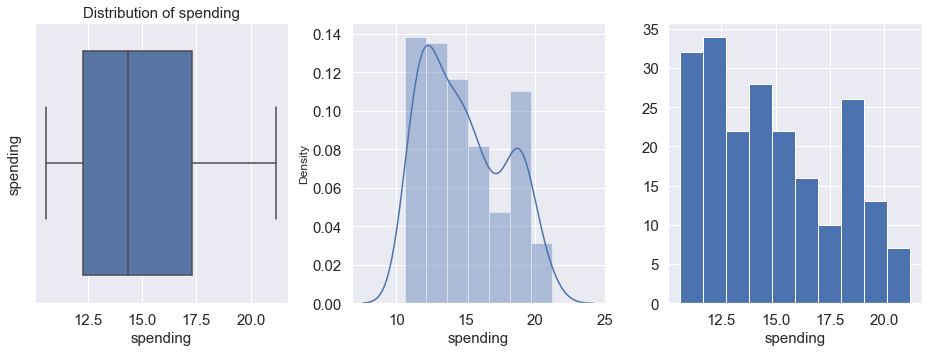

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_xlabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [32]:
###advance_payments
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('1st Quartile (Q1) for advance_payments:', Q1)
print('3rd Quartile (Q3) for advance_payments is:', Q3)
print('Interquartile range (IQR) of advance_payment is:',stats.iqr(df['advance_payments']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for advance_payments variable:', L_Out)
print('Upper outliers for advance_payments variable:', U_Out)

1st Quartile (Q1) for advance_payments: 13.45
3rd Quartile (Q3) for advance_payments is: 15.715
Interquartile range (IQR) of advance_payment is: 2.2650000000000006
Lower outliers for advance_payments variable: 10.052499999999998
Upper outliers for advance_payments variable: 19.1125


In [27]:
print('Number of outliers in advance_payment upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payment lower : ', df[df['advance_payments']<10.052]['advance_payments'].count())

Number of outliers in advance_payment upper :  0
Number of outliers in advance_payment lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


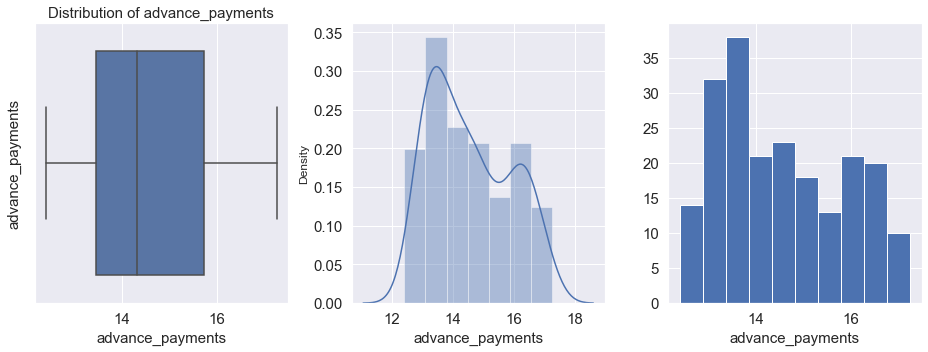

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=df,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_xlabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [33]:
###probability_of_full_payment
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('1st Quartile (Q1) for probability_of_full_payment:', Q1)
print('3rd Quartile (Q3) for probability_of_full_payment:', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is:',stats.iqr(df['probability_of_full_payment']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for probability_of_full_payment variable:', L_Out)
print('Upper outliers for probability_of_full_payment variable:', U_Out)

1st Quartile (Q1) for probability_of_full_payment: 0.8569
3rd Quartile (Q3) for probability_of_full_payment: 0.887775
Interquartile range (IQR) of probability_of_full_payment is: 0.030874999999999986
Lower outliers for probability_of_full_payment variable: 0.8105875
Upper outliers for probability_of_full_payment variable: 0.9340875


In [34]:
print('Number of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.934]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']<0.8105]['probability_of_full_payment'].count())

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


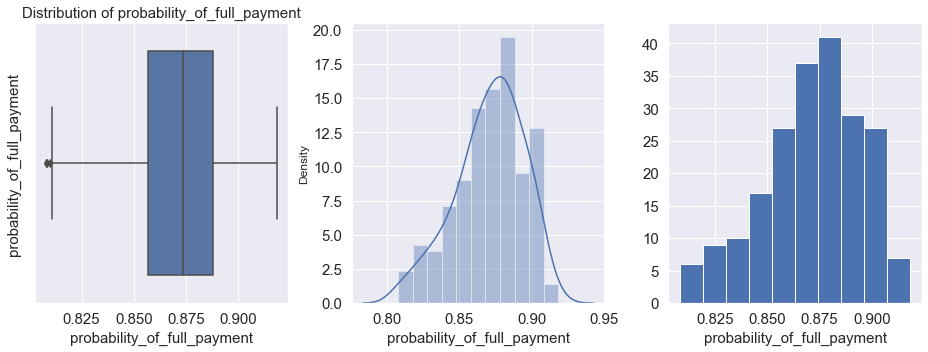

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_xlabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [37]:
###current_balance
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('1st Quartile (Q1) for current_balance:', Q1)
print('3rd Quartile (Q3) for current_balance :', Q3)
print('Interquartile range (IQR) of current_balanceis:',stats.iqr(df['current_balance']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for current_balance variable:', L_Out)
print('Upper outliers for current_balance variable:', U_Out)

1st Quartile (Q1) for current_balance: 5.26225
3rd Quartile (Q3) for current_balance : 5.97975
Interquartile range (IQR) of current_balanceis: 0.7175000000000002
Lower outliers for current_balance variable: 4.186
Upper outliers for current_balance variable: 7.056000000000001


In [38]:
print('Number of outliers in current_balance upper : ', df[df['current_balance']>7.056]['current_balance'].count())
print('Number of outliers in current_balance lower : ', df[df['current_balance']<4.186]['current_balance'].count())

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


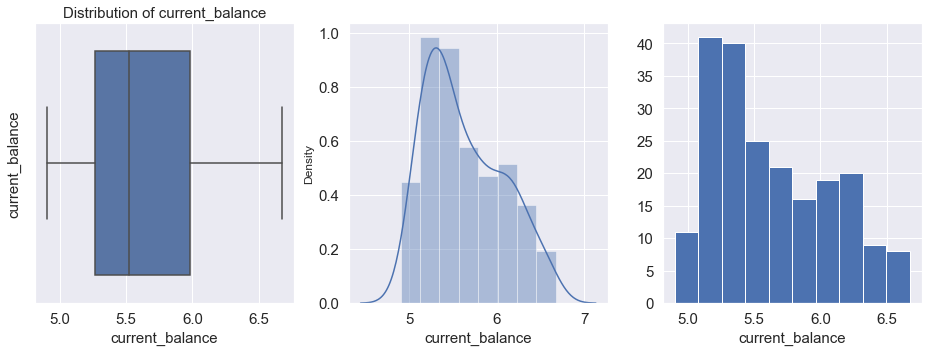

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_xlabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [42]:
###credit_limit
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('1st Quartile (Q1) for credit_limit:', Q1)
print('3rd Quartile (Q3) for credit_limit :', Q3)
print('Interquartile range (IQR) of credit_limit is:',stats.iqr(df['credit_limit']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for credit_limit variable:', L_Out)
print('Upper outliers for credit_limit variable:', U_Out)

1st Quartile (Q1) for credit_limit: 2.9440000000000004
3rd Quartile (Q3) for credit_limit : 3.56175
Interquartile range (IQR) of credit_limit is: 0.6177499999999996
Lower outliers for credit_limit variable: 2.0173750000000013
Upper outliers for credit_limit variable: 4.488375


In [43]:
print('Number of outliers in credit_limit upper : ', df[df['credit_limit']>4.488]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df[df['credit_limit']<2.0173]['credit_limit'].count())

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


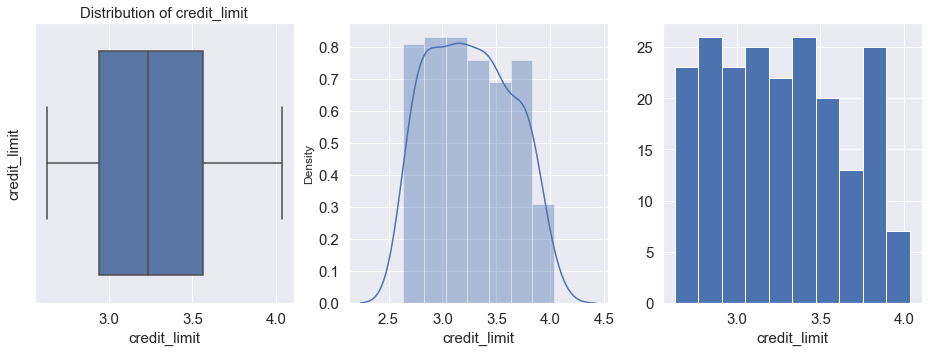

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_xlabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [46]:
###min_payment_amt
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('1st Quartile (Q1) for min_payment_amt:', Q1)
print('3rd Quartile (Q3) for min_payment_amt :', Q3)
print('Interquartile range (IQR) of min_payment_amt is:',stats.iqr(df['min_payment_amt']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for min_payment_amt variable:', L_Out)
print('Upper outliers for min_payment_amt variable:', U_Out)

1st Quartile (Q1) for min_payment_amt: 2.5614999999999997
3rd Quartile (Q3) for min_payment_amt : 4.76875
Interquartile range (IQR) of min_payment_amt is: 2.20725
Lower outliers for min_payment_amt variable: -0.7493750000000006
Upper outliers for min_payment_amt variable: 8.079625


In [47]:
print('Number of outliers in min_payment_amt upper : ', df[df['min_payment_amt']> 8.0796]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df[df['min_payment_amt']<-0.7493]['min_payment_amt'].count())

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


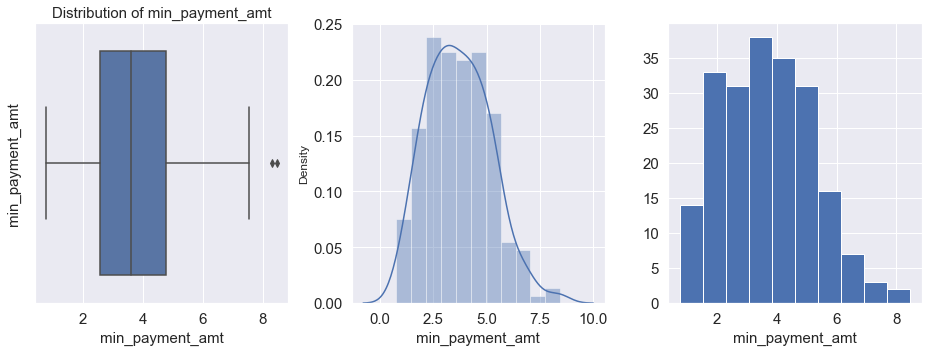

In [49]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_xlabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [50]:
###max_spent_in_single_shopping
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('1st Quartile (Q1) for max_spent_in_single_shopping:', Q1)
print('3rd Quartile (Q3) for max_spent_in_single_shopping :', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is:',stats.iqr(df['max_spent_in_single_shopping']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for max_spent_in_single_shopping variable:', L_Out)
print('Upper outliers for max_spent_in_single_shopping variable:', U_Out)

1st Quartile (Q1) for max_spent_in_single_shopping: 5.045
3rd Quartile (Q3) for max_spent_in_single_shopping : 5.877000000000001
Interquartile range (IQR) of max_spent_in_single_shopping is: 0.8320000000000007
Lower outliers for max_spent_in_single_shopping variable: 3.796999999999999
Upper outliers for max_spent_in_single_shopping variable: 7.125000000000002


In [52]:
print('Number of outliers in max_spent_in_single_shopping upper : ', df[df['max_spent_in_single_shopping']>7.1250]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', df[df['max_spent_in_single_shopping']<3.7969]['max_spent_in_single_shopping'].count())

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


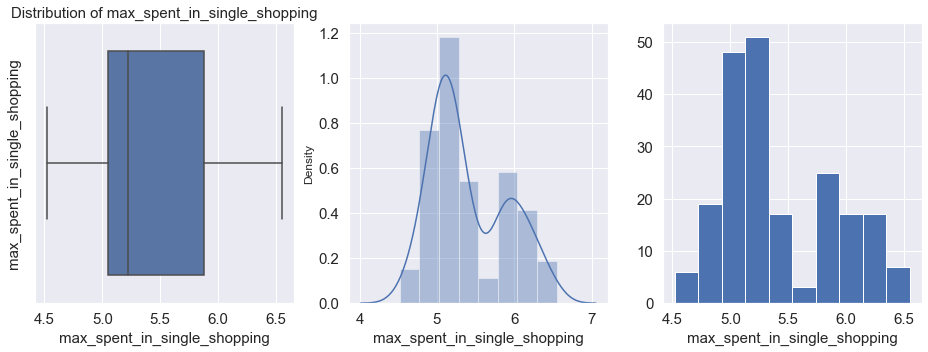

In [54]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [55]:
#skewness of values 
df.skew().sort_values(ascending=True)

probability_of_full_payment    -0.537954
credit_limit                    0.134378
advance_payments                0.386573
spending                        0.399889
min_payment_amt                 0.401667
current_balance                 0.525482
max_spent_in_single_shopping    0.561897
dtype: float64

Multivariate analysis

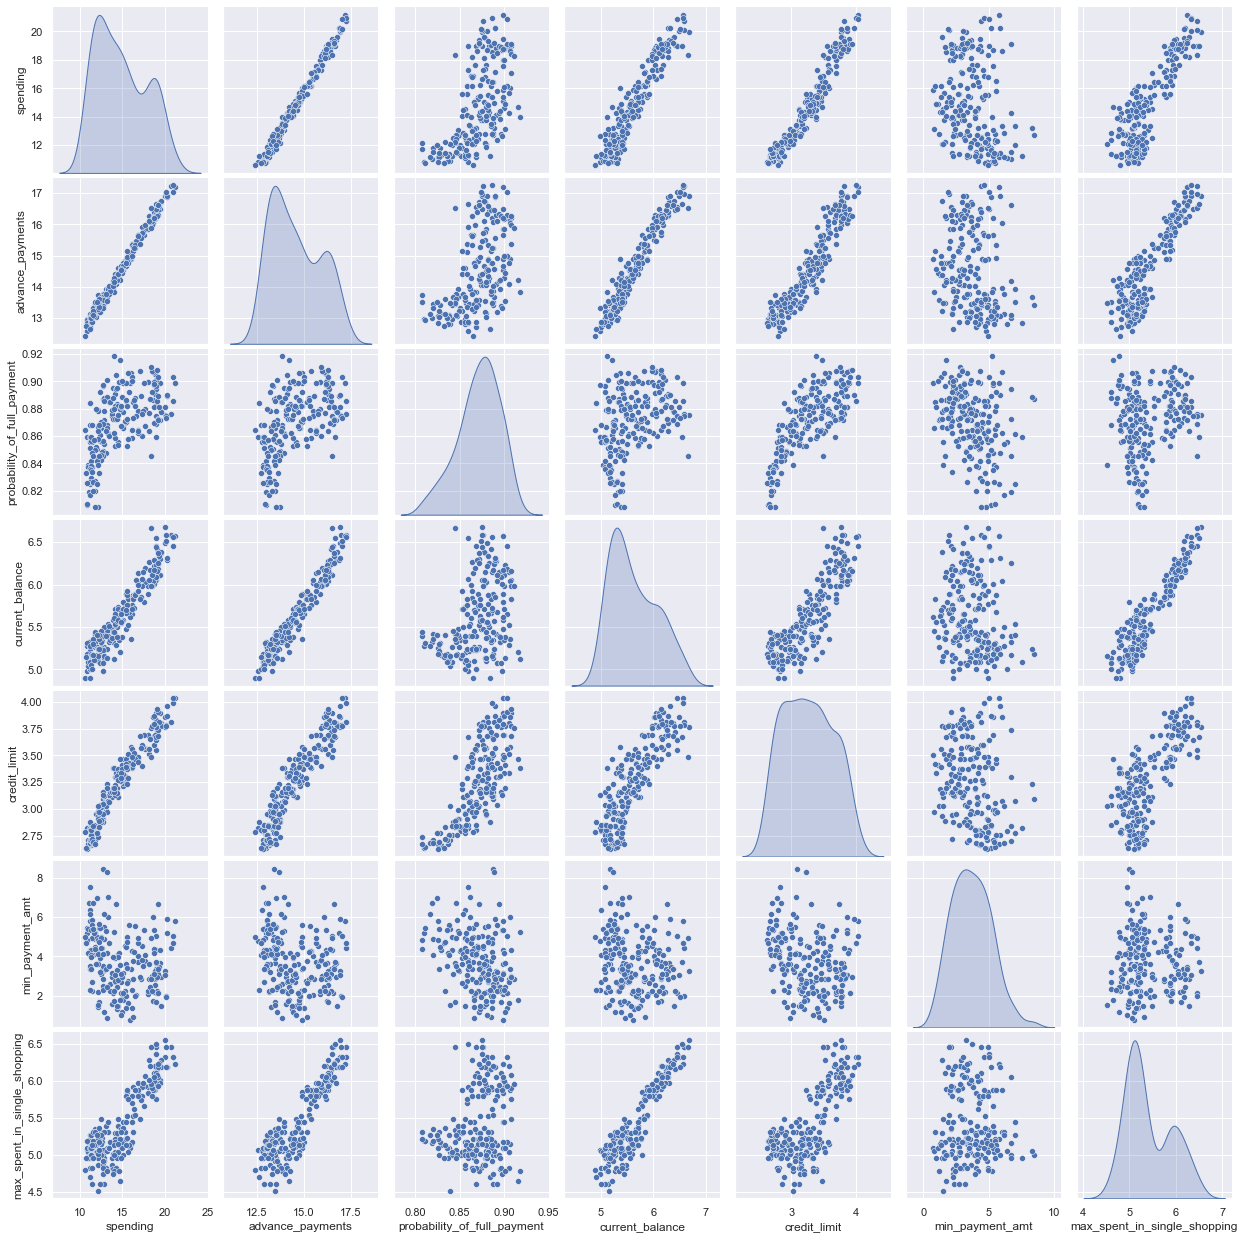

In [232]:
sns.pairplot(df,diag_kind='kde')

In [71]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


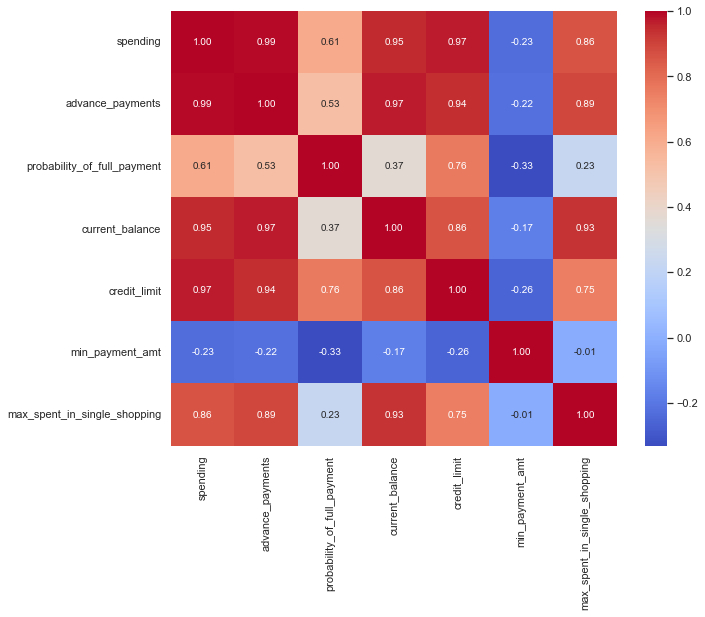

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [103]:
new_df=df.copy()

In [104]:
check_outliers(new_df)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


<AxesSubplot:>

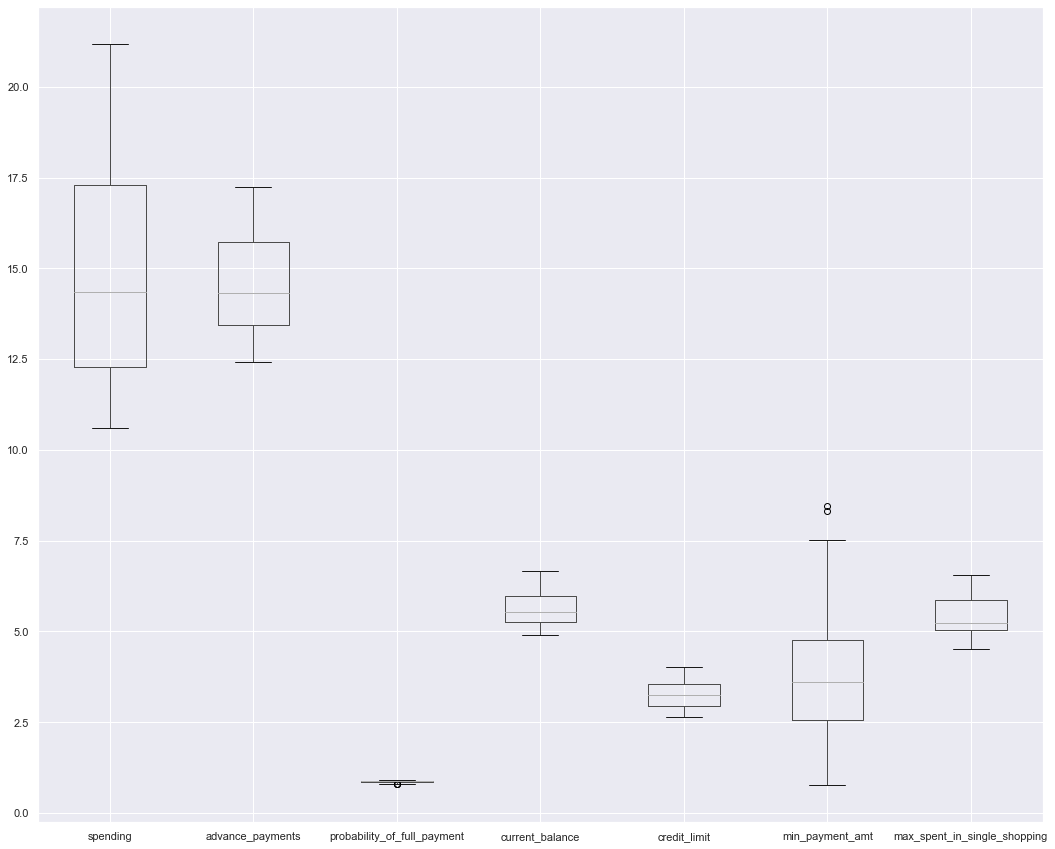

In [105]:
df.boxplot(figsize=(18,15))

1.2  Do you think scaling is necessary for clustering in this case? Justify

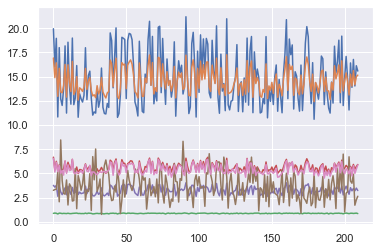

In [109]:
#before scaling
plt.plot(new_df)
plt.show()

In [15]:
from scipy.stats import zscore
new_df_scaled=df.apply(zscore)
new_df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


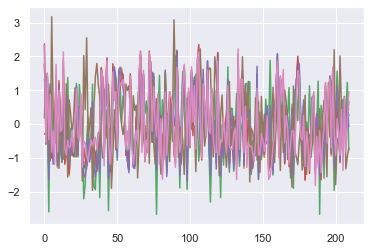

In [16]:
#after scaling
plt.plot(new_df_scaled)
plt.show()

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

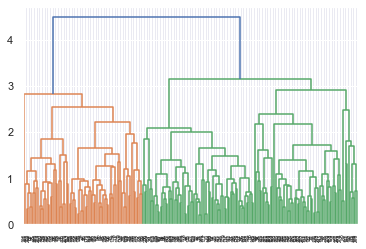

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_meth = linkage(new_df_scaled, method = 'average')
dend = dendrogram(link_meth)

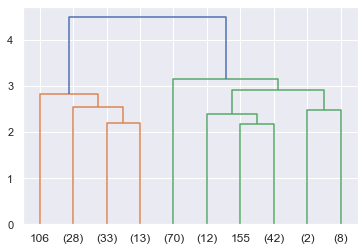

In [18]:
dend = dendrogram(link_meth,truncate_mode='lastp',p = 10)

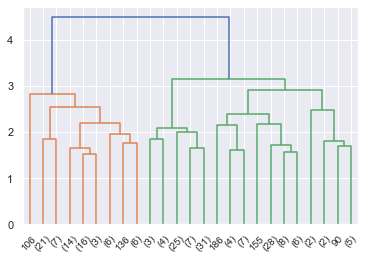

In [19]:
dend = dendrogram(link_meth,truncate_mode='lastp',p = 25)

In [20]:
from scipy.cluster.hierarchy import fcluster
clusters_3 = fcluster(link_meth, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [22]:
new_df_1=df.copy()
new_df_1['clusters'] = clusters_3

In [23]:
new_df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [24]:
new_df_1['clusters'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [25]:
agg_df=new_df_1.groupby('clusters').mean()
agg_df['Freq']=new_df_1['clusters'].value_counts().sort_index()
agg_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [27]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 1)
k_means.fit(new_df_scaled)
k_means.inertia_

1469.9999999999998

In [125]:
k_means = KMeans(n_clusters = 2)
k_means.fit(new_df_scaled)
k_means.inertia_

659.171754487041

In [131]:
wss =[] 
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(new_df_scaled)
        wss.append(KM.inertia_)
        

In [132]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.65314399951626,
 326.510781656997,
 289.49756707129455,
 267.89073787183946,
 240.03922933436522,
 222.21865913023618,
 208.53897780051406]

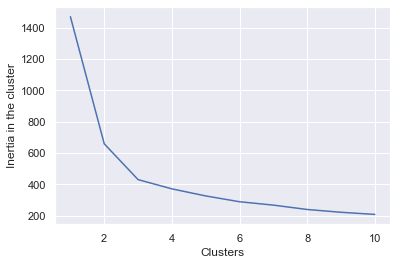

In [133]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [157]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(new_df_scaled)
labels_4 = k_means_4.labels_
kmeans4_df=df.copy()
kmeans4_df["Clus_kmeans"] = labels_4
kmeans4_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [158]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(new_df_scaled,labels_4)

0.3347912611982699

In [159]:
from sklearn import metrics
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(new_df_scaled)
    scores.append(metrics.silhouette_score(new_df_scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.4007270552751299,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272518,
 0.2694844355168535,
 0.25437316027505635,
 0.2623959398663564,
 0.2673980772529917]

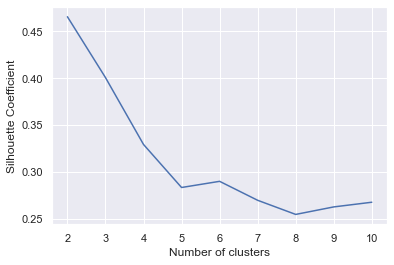

In [160]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [161]:
sil_width = silhouette_samples(new_df_scaled,labels_4)
kmeans4_df["sil_width"] = sil_width
kmeans4_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.472460
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.063400
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.494127
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.530355
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.152686


In [162]:
silhouette_samples(new_df_scaled,labels_4).min()

-0.020412913640459072

In [163]:
km_3 = KMeans(n_clusters=3,random_state=123)
km_3.fit(new_df_scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [164]:
pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

In [165]:
kmeans1_df=df.copy()

In [166]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_df_scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
kmeans1_df['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans1_df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [167]:
def ClusterPercentage(dfr,name):

    size = pd.Series(dfr[name].value_counts().sort_index())
    percent = pd.Series(round(dfr[name].value_counts()/dfr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [168]:
ClusterPercentage(kmeans1_df,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


In [169]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [154]:
agg_df.T

clusters-3,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


PROBLEM 2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [16]:
insu = pd.read_csv("insurance_part2_data.csv")
insu.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [17]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [18]:
insu.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [19]:
insu.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [20]:
insu.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
insu.shape

(3000, 10)

In [22]:
print(insu['Agency_Code'].value_counts())
print('\n')
print(insu['Type'].value_counts())
print('\n')
print(insu['Claimed'].value_counts())
print('\n')
print(insu['Channel'].value_counts())
print('\n')
print(insu['Product Name'].value_counts())
print('\n')
print(insu['Destination'].value_counts())

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


No     2076
Yes     924
Name: Claimed, dtype: int64


Online     2954
Offline      46
Name: Channel, dtype: int64


Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [23]:
dups = insu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insu[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Univariate analysis

In [24]:
###age
Q1=insu['Age'].quantile(q=0.25)
Q3=insu['Age'].quantile(q=0.75)
print('1st Quartile (Q1) for Age:', Q1)
print('3rd Quartile (Q3) for Age :', Q3)
print('Interquartile range (IQR) of Age is:',stats.iqr(insu['Age']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for Age variable:', L_Out)
print('Upper outliers for Age variable:', U_Out)

1st Quartile (Q1) for Age: 32.0
3rd Quartile (Q3) for Age : 42.0
Interquartile range (IQR) of Age is: 10.0
Lower outliers for Age variable: 17.0
Upper outliers for Age variable: 57.0


In [25]:
print('Number of outliers in Age upper : ', insu[insu['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', insu[insu['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(insu[insu['Age']>57.0]['Age'].count()*100/len(insu)), '%')
print('% of Outlier in Age lower: ',round(insu[insu['Age']<17.0]['Age'].count()*100/len(insu)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


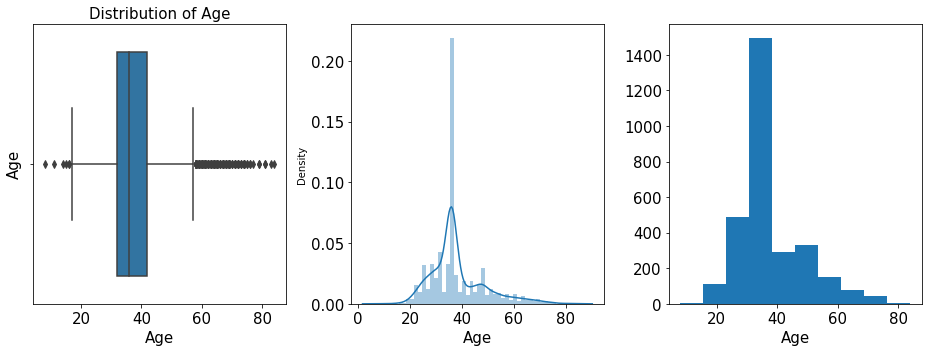

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Age',data=insu,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(insu['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(insu['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [27]:
###Commision
Q1=insu['Commision'].quantile(q=0.25)
Q3=insu['Commision'].quantile(q=0.75)
print('1st Quartile (Q1) for Commision:', Q1)
print('3rd Quartile (Q3) for Commision:', Q3)
print('Interquartile range (IQR) of Commision is:',stats.iqr(insu['Commision']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for Commision variable:', L_Out)
print('Upper outliers for Commision variable:', U_Out)

1st Quartile (Q1) for Commision: 0.0
3rd Quartile (Q3) for Commision: 17.235
Interquartile range (IQR) of Commision is: 17.235
Lower outliers for Commision variable: -25.8525
Upper outliers for Commision variable: 43.0875


In [28]:
print('Number of outliers in Commision upper : ', insu[insu['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', insu[insu['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(insu[insu['Commision']>43.0875]['Commision'].count()*100/len(insu)), '%')
print('% of Outlier in Commision lower: ',round(insu[insu['Commision']<-25.8525]['Commision'].count()*100/len(insu)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


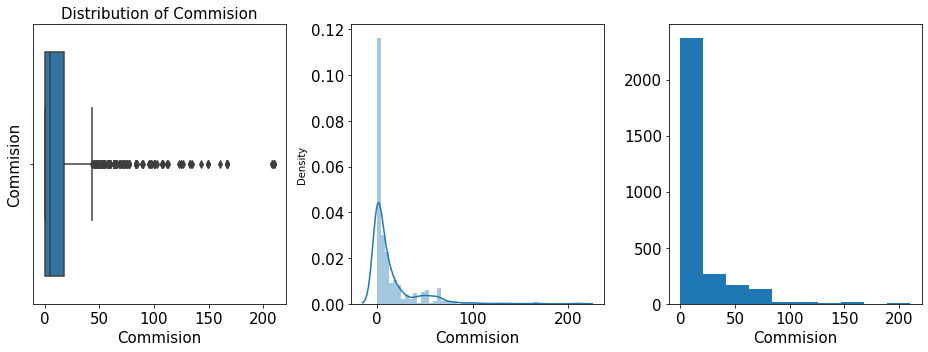

In [29]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Commision',data=insu,orient='v',ax=ax1)
ax1.set_ylabel('Commision', fontsize=15)
ax1.set_xlabel('Commision', fontsize=15)
ax1.set_title('Distribution of Commision', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(insu['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(insu['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [30]:
###Duration
Q1=insu['Duration'].quantile(q=0.25)
Q3=insu['Duration'].quantile(q=0.75)
print('1st Quartile (Q1) for Duration:', Q1)
print('3rd Quartile (Q3) for Duration:', Q3)
print('Interquartile range (IQR) of Duration is:',stats.iqr(insu['Duration']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for Duration variable:', L_Out)
print('Upper outliers for Duration variable:', U_Out)

1st Quartile (Q1) for Duration: 11.0
3rd Quartile (Q3) for Duration: 63.0
Interquartile range (IQR) of Duration is: 52.0
Lower outliers for Duration variable: -67.0
Upper outliers for Duration variable: 141.0


In [31]:
print('Number of outliers in Duration upper : ', insu[insu['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', insu[insu['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(insu[insu['Duration']>141.0]['Duration'].count()*100/len(insu)), '%')
print('% of Outlier in Duration lower: ',round(insu[insu['Duration']<-67.0]['Duration'].count()*100/len(insu)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


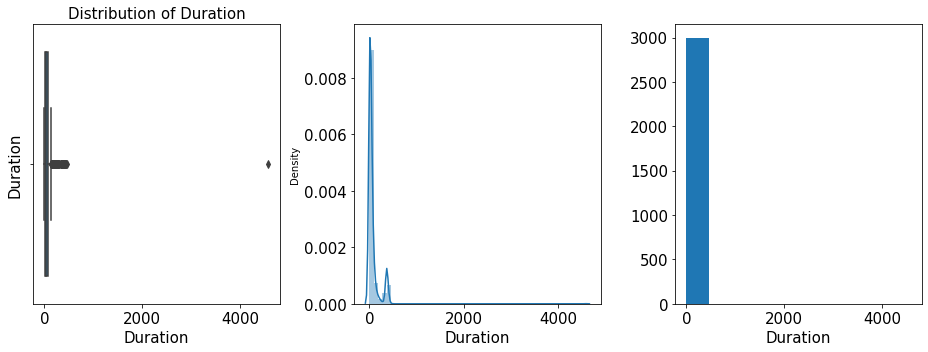

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Duration',data=insu,orient='v',ax=ax1)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_xlabel('Duration', fontsize=15)
ax1.set_title('Distribution of Duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(insu['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(insu['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [33]:
###Sales
Q1=insu['Sales'].quantile(q=0.25)
Q3=insu['Sales'].quantile(q=0.75)
print('1st Quartile (Q1) for Sales:', Q1)
print('3rd Quartile (Q3) for Sales:', Q3)
print('Interquartile range (IQR) of Sales is:',stats.iqr(insu['Sales']))

#detection of outliers
L_Out=Q1-1.5*(Q3-Q1)
U_Out=Q3+1.5*(Q3-Q1)
print('Lower outliers for Sales variable:', L_Out)
print('Upper outliers for Sales variable:', U_Out)

1st Quartile (Q1) for Sales: 20.0
3rd Quartile (Q3) for Sales: 69.0
Interquartile range (IQR) of Sales is: 49.0
Lower outliers for Sales variable: -53.5
Upper outliers for Sales variable: 142.5


In [34]:
print('Number of outliers in Sales upper : ', insu[insu['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', insu[insu['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(insu[insu['Sales']>142.5]['Sales'].count()*100/len(insu)), '%')
print('% of Outlier in Sales lower: ',round(insu[insu['Sales']<-53.5]['Sales'].count()*100/len(insu)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


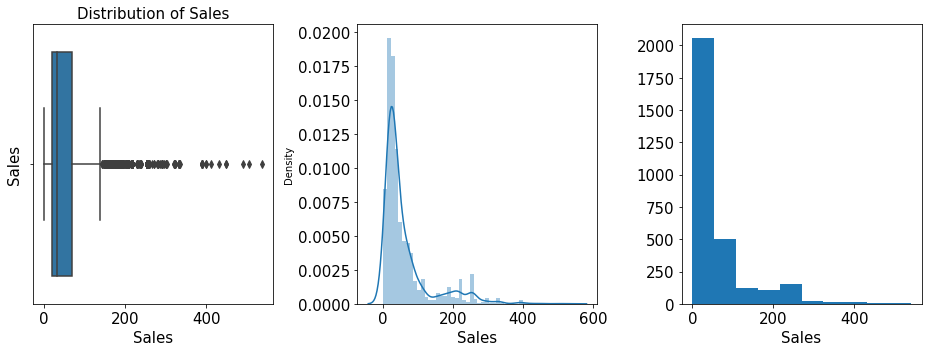

In [35]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Sales',data=insu,orient='v',ax=ax1)
ax1.set_ylabel('Sales', fontsize=15)
ax1.set_xlabel('Sales', fontsize=15)
ax1.set_title('Distribution of Sales', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(insu['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(insu['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

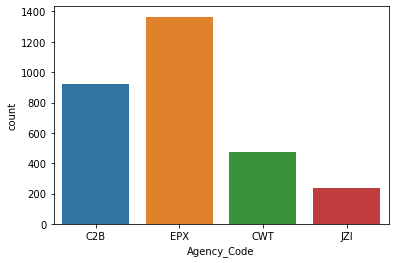

In [36]:
###agency_code
sns.countplot(data = insu, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

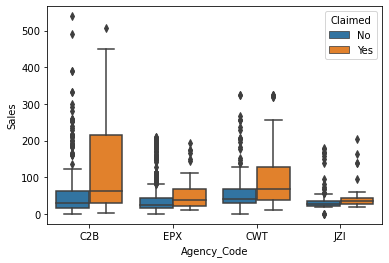

In [37]:
sns.boxplot(data = insu, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

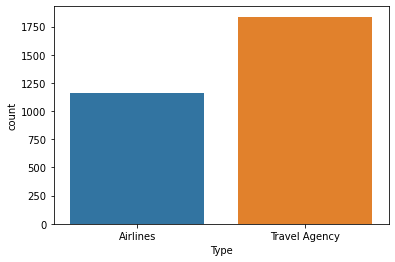

In [38]:
###type
sns.countplot(data = insu, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

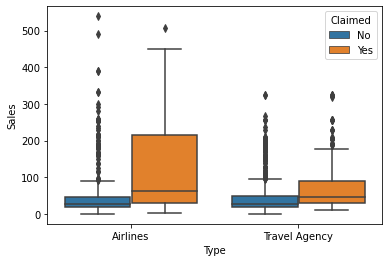

In [39]:
sns.boxplot(data = insu, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

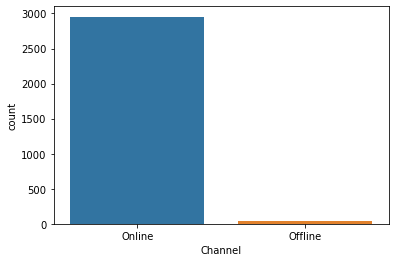

In [40]:
###channel
sns.countplot(data = insu, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

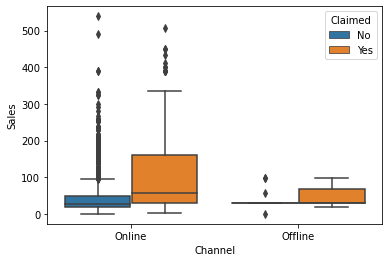

In [41]:
sns.boxplot(data = insu, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

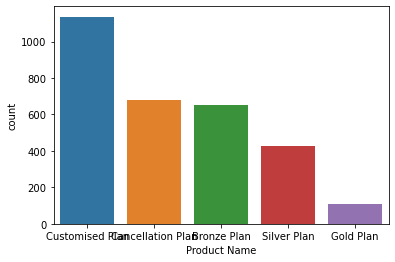

In [42]:
###Product Name
sns.countplot(data = insu, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

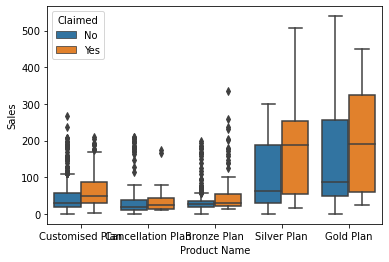

In [43]:
sns.boxplot(data = insu, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

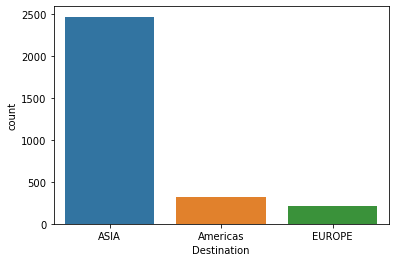

In [44]:
###Destination
sns.countplot(data = insu, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

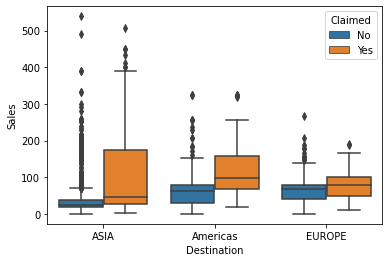

In [45]:
sns.boxplot(data = insu, x='Destination',y='Sales', hue='Claimed')

Multivariate analysis

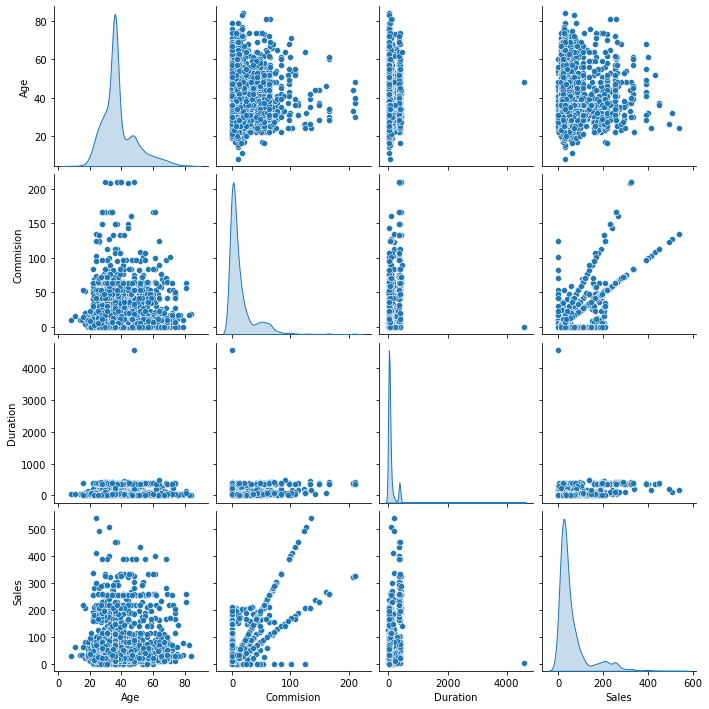

In [46]:
sns.pairplot(insu,diag_kind='kde')

In [47]:
insu.corr().T

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


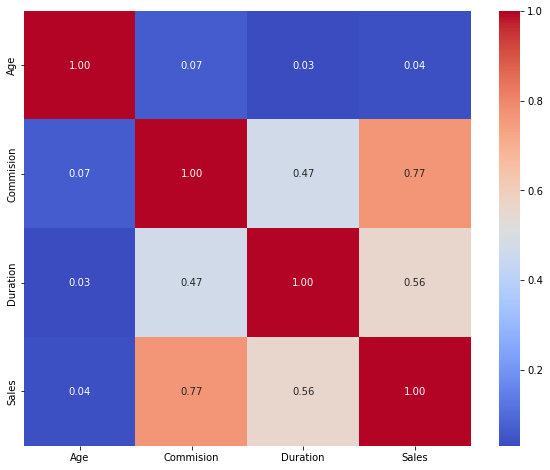

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(insu.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [49]:
for feature in insu.columns: 
    if insu[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insu[feature].unique()))
        print(pd.Categorical(insu[feature].unique()).codes)
        insu[feature] = pd.Categorical(insu[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [50]:
insu.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [51]:
insu.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [52]:
X =insu.drop("Claimed", axis=1)

y = insu.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


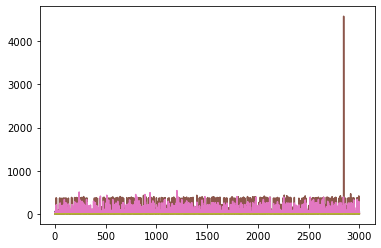

In [53]:
#before scaling 
plt.plot(X)
plt.show()

In [54]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


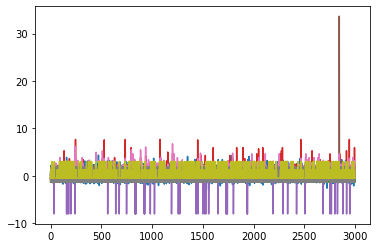

In [55]:
#after scaling 
plt.plot(X_scaled)
plt.show()

In [56]:
#splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [57]:
#checking dimensions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [58]:
# Decision Tree Classifier

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85,4.90,4.95,5.0,5.05,5.10,5.15,5.20],
    'min_samples_leaf': [40,41,42,43,44,45], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 230}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=230, random_state=1)

In [59]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

The decision tree can be generated in the following website:
http://www.webgraphviz.com/

In [60]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634112
Sales         0.220899
Product Name  0.086632
Commision     0.021881
Age           0.019940
Duration      0.016536
Type          0.000000
Channel       0.000000
Destination   0.000000


In [61]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.697947,0.302053
1,0.979452,0.020548
2,0.921171,0.078829
3,0.510417,0.489583
4,0.921171,0.078829


In [62]:
# Random Forest Classifier
param_grid_rfcl = {
    'max_depth': [20,30,40],
    'max_features': [7,8,9],
    'min_samples_leaf': [50,100],
    'min_samples_split': [60,70],
    'n_estimators': [100,200] 
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [63]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'max_depth': 20, 'max_features': 9, 'min_samples_leaf': 50, 'min_samples_split': 60, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, max_features=9, min_samples_leaf=50,
                       min_samples_split=60, n_estimators=200, random_state=1)

In [64]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [65]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.764425,0.235575
1,0.988304,0.011696
2,0.905682,0.094318
3,0.561293,0.438707
4,0.883504,0.116496


In [66]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.565184
Sales         0.210684
Product Name  0.105034
Duration      0.051381
Commision     0.034964
Age           0.029495
Destination   0.002392
Type          0.000866
Channel       0.000000


In [67]:
# Neural Network Classifier

param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,3000,4000], 
    'solver': ['sgd'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [68]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1,
              solver='sgd', tol=0.01)

In [69]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [70]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.758510,0.241490
1,0.800720,0.199280
2,0.796798,0.203202
3,0.710660,0.289340
4,0.731916,0.268084


2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

AUC: 0.82


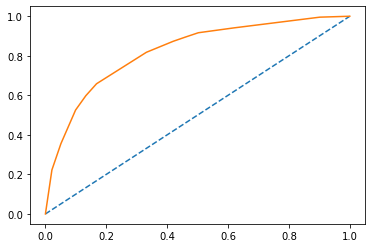

In [72]:
probs_cart = best_grid_dtcl.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
# calculate AUC for training data
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.2f' % cart_train_auc)
# calculate roc curve for training data
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.80


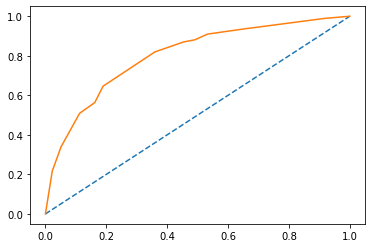

In [73]:
probs_cart = best_grid_dtcl.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
# calculate AUC for test data
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.2f' % cart_test_auc)
# calculate roc curve test data
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [74]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1309,  144],
       [ 307,  340]], dtype=int64)

In [75]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7852380952380953

In [76]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [77]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.53
cart_train_f1  0.6


In [78]:
#dtcl test data
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[553,  70],
       [136, 141]], dtype=int64)

In [79]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7711111111111111

In [80]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [81]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.51
cart_test_f1  0.58


In [82]:
#rfcl
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1294,  159],
       [ 276,  371]], dtype=int64)

In [83]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.7928571428571428

In [84]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1453
           1       0.70      0.57      0.63       647

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [85]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.7
rf_train_recall  0.57
rf_train_f1  0.63


Area under Curve is 0.8405611797155808


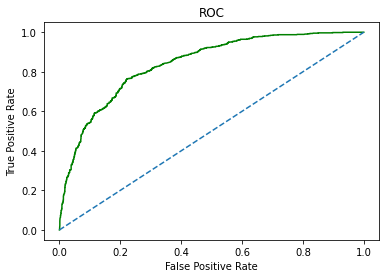

In [86]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [87]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[548,  75],
       [125, 152]], dtype=int64)

In [88]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7777777777777778

In [89]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       623
           1       0.67      0.55      0.60       277

    accuracy                           0.78       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



In [90]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.55
rf_test_f1  0.6


Area under Curve is 0.8125438225426056


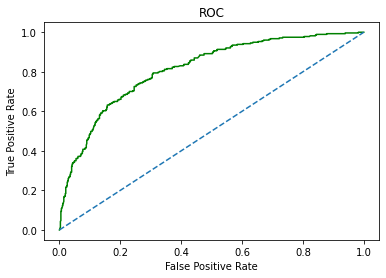

In [91]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [92]:
#nncl
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1340,  113],
       [ 396,  251]], dtype=int64)

In [93]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7576190476190476

In [94]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1453
           1       0.69      0.39      0.50       647

    accuracy                           0.76      2100
   macro avg       0.73      0.66      0.67      2100
weighted avg       0.75      0.76      0.73      2100



In [95]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.39
nn_train_f1  0.5


Area under Curve is 0.7790697921796932


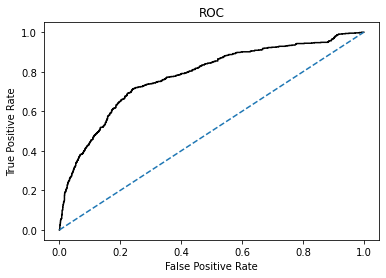

In [96]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [97]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[576,  47],
       [171, 106]], dtype=int64)

In [98]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7577777777777778

In [99]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       623
           1       0.69      0.38      0.49       277

    accuracy                           0.76       900
   macro avg       0.73      0.65      0.67       900
weighted avg       0.75      0.76      0.73       900



In [100]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.69
nn_test_recall  0.38
nn_test_f1  0.49


Area under Curve is 0.7587891360657353


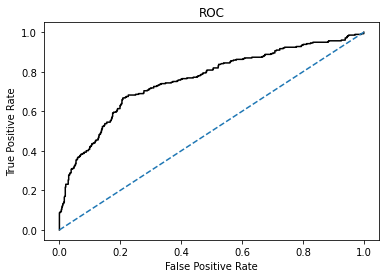

In [101]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [102]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.79,0.78,0.76,0.76
AUC,0.82,0.80,0.84,0.81,0.78,0.76
Recall,0.53,0.51,0.57,0.55,0.39,0.38
Precision,0.70,0.67,0.70,0.67,0.69,0.69
F1 Score,0.60,0.58,0.63,0.60,0.50,0.49


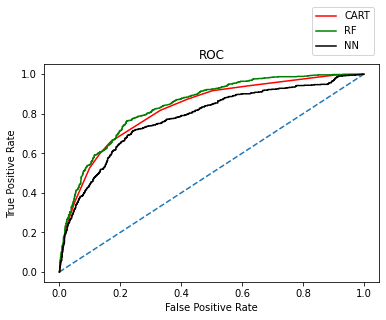

In [103]:
#ROC curve for all models using training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

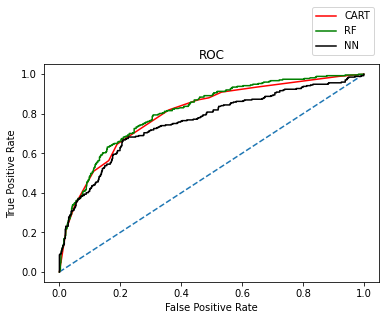

In [104]:
#ROC curve for all models using test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

THE END